In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
path = "./B题附件1.xlsx"
data = pd.read_excel(path, sheet_name=0)

In [3]:
data.head()

,节点,传感器经度,传感器纬度
0,数据中心,120.701520,36.374227
1,传感器1,120.698717,36.374576
2,传感器2,120.699795,36.375912
3,传感器3,120.706910,36.375796
4,传感器4,120.705616,36.372483


In [4]:
node_num = data.shape[0]

In [54]:
x = data['传感器经度']
y = data['传感器纬度']
x0 = x[0]
y0 = y[0]
x1 = x[1:]
y1 = y[1:]
# xs = 120.701520
# xl = 120.72
xs = np.linspace(120.68, 120.72, 50)
# y2 = [36.374227]* 50
k2 = 2.1
y3 = k2 * xs + 36.374227 - 120.701520 * k2
k3 = -0.04
y4 = k3 * xs + 36.374227 - 120.701520 * k3

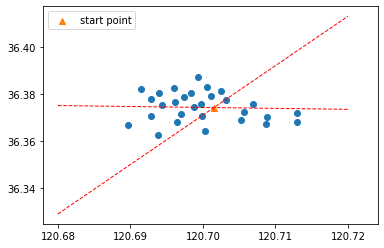

In [55]:
plt.scatter(x1, y1, marker='o')
plt.scatter(x0, y0, marker='^', label="start point")
plt.plot(xs, y3, color='red', linewidth=1.0, linestyle='--')
plt.plot(xs, y4, color='red', linewidth=1.0, linestyle='--')

plt.legend(loc='best')
plt.show()

In [50]:
path = "./data/B题附件1.xlsx"
df = pd.read_excel(path, sheet_name=0)
v = df.iloc[:, 1:3]
train_v = np.array(v)

In [53]:
center_loc = np.array(df.iloc[0:1, 1:3])
center_loc

array([[120.70152019,  36.37422699]])

In [24]:
np.array(df.iloc[:, 0])

array(['数据中心', '传感器1', '传感器2', '传感器3', '传感器4', '传感器5', '传感器6', '传感器7',
       '传感器8', '传感器9', '传感器10', '传感器11', '传感器12', '传感器13', '传感器14',
       '传感器15', '传感器16', '传感器17', '传感器18', '传感器19', '传感器20', '传感器21',
       '传感器22', '传感器23', '传感器24', '传感器25', '传感器26', '传感器27', '传感器28',
       '传感器29'], dtype=object)

In [172]:
path = "./B题附件2.xlsx"
df = pd.read_excel(path, sheet_name=0)

In [200]:
p = np.array(df.iloc[:, 3])
p[0] = 0
a = p.astype(np.float64)
a.dtype

dtype('float64')

In [176]:
v = np.array(df.iloc[:, 1:4])

In [184]:
center = v[0][:2].astype(np.float64)
center

array([120.70152019,  36.37422699])

In [192]:
node = v[1:]
node[:][0:2]

array([[120.69871747472, 36.3745756929757, 5.4],
       [120.699795441332, 36.3759123905177, 7.8]], dtype=object)

In [ ]:
road = [0, 21, 23, 24, 28, 22, 3, 4, 5, 13, 10, 16, 27, 12, 8, 15, 9, 7, 11, 6, 14, 25, 18, 26, 19, 20, 1, 2, 17, 29]

In [ ]:
def get_distance(x1, y1, x2, y2):
    # x,y分别表示一个经纬度坐标点
    if x1 == x2 and y1 == y2:
        return 0
    R = 6371
    theta = math.acos(math.sin(x1) * math.sin(x2) + (math.cos(x1) * math.cos(x2) * math.cos(y1 - y2)))
    L = theta * R
    return L

In [59]:
l = np.array([2, 3])
p = np.array([3, 4])
k = []
k.append(l)
k.append(p)

In [60]:
[1, 3] in k

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()